In [1]:
import pandas as pd
import networkx as nx
from pyboolnet.external.bnet2primes import bnet_text2primes
from pyboolnet.prime_implicants import percolate
from pyboolnet.file_exchange import primes2bnet
from pyboolnet.state_transition_graphs import primes2stg

from sdmarkov.transition_matrix import get_transition_matrix
from sdmarkov.graph import get_markov_chain
from sdmarkov.matrix_operations import compress_matrix
from sdmarkov.grouping import sd_grouping

In [2]:
# --- example 1 ---
# bnet = """
# targets, factors
# A, A & C
# B, C
# C, B
# """

# --- n010_085.bnet ---
bnet="""
targets, factors
n0, (!n2 & !n1 & n4)
n1, (!n6 & n2 & n8) | (n6 & !n2 & n8)
n2, 0
n3, (!n7 & !n1 & !n5) | (n7 & n1 & n5)
n4, (!n6 & !n5 & !n8) | (!n6 & !n5 & n8)
n5, 0
n6, (n6 & !n5 & !n1) | (n6 & n5 & !n1)
n7, (!n2 & !n9 & n7)
n8, (n0 & !n7 & !n5)
n9, 0
"""

In [3]:
# import bnet
primes = bnet_text2primes(bnet)

# Percolate constant nodes
percolated_primes = percolate(primes, remove_constants=True, copy=True)
percolated_bnet = primes2bnet(percolated_primes)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.714286,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.142857,0.571429,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.857143,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.142857,0.714286,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.857143,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142857,0.428571,0.000000,0.000000,0.000000,0.000000
124,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000
125,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000
126,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.285714,0.000000


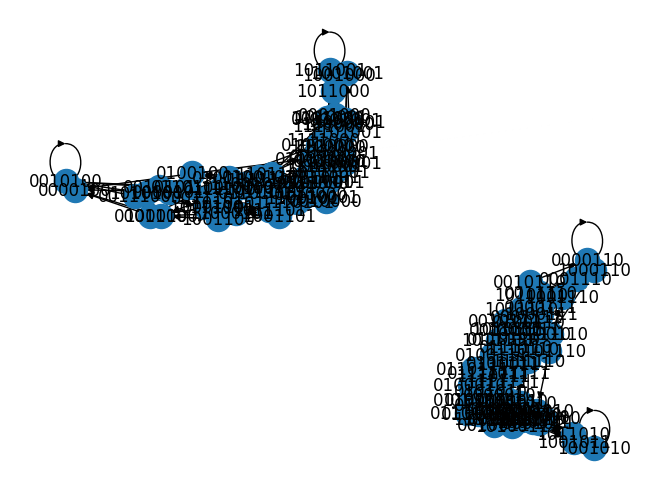

In [4]:
# --- full state transition graph ---
stg = primes2stg(percolated_primes, "asynchronous")

nx.draw(stg, with_labels=True, arrows=True)

# --- full transition matrix ---
T = get_transition_matrix(stg)

display(pd.DataFrame(T))

,0,1,2,3,4,5,6,7,8,9
0,0.885714,0.000000,0.019048,0.000000,0.000000,0.000000,0.076190,0.000000,0.000000,0.019048
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.007653,0.000000,0.007653,0.000000,0.938776,0.000000,0.022959,0.022959,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.023041,0.000000,0.976959,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.904762,0.000000,0.000000
8,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904762,0.000000
9,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143


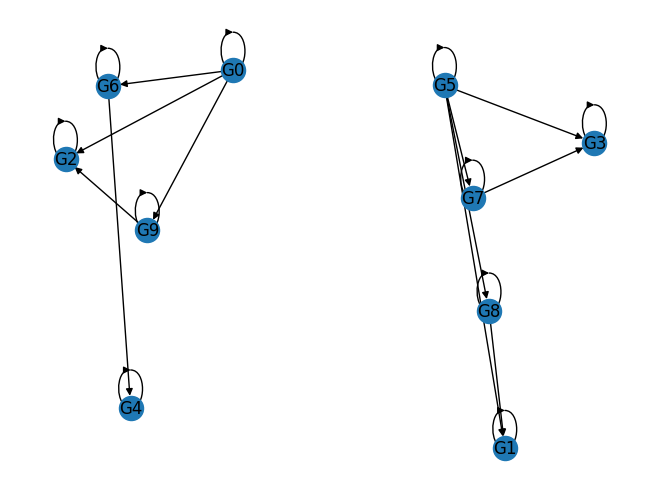

In [5]:
# --- SD grouped transition matrix ---
sd_indices = sd_grouping(percolated_bnet)
Tsd = compress_matrix(T, sd_indices)
display(pd.DataFrame(Tsd))

sd_mc = get_markov_chain(Tsd, sd_indices)

nx.draw(sd_mc, with_labels=True)